### Step 1: Data Cleaning and Preprocessing
## 1.1 Load the Dataset

In [30]:
import pandas as pd

# Load the dataset
file_path = '/home/nyandieka/Downloads/Cancer.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
print(df.head())


  Country or Territory  \
0          Afghanistan   
1              Algeria   
2           Azerbaijan   
3              Albania   
4              Armenia   

  Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                                0.5                                                                                      
1                                                1.1                                                                                      
2                                                3.2                                                                                      
3                                                4.9                                                                                      
4                                                  5                                                                                      

  Smokin

## 1.2 Replace "No data" with NaN

In [31]:
import numpy as np

# Replace "No data" with NaN
df.replace("No data", np.nan, inplace=True)

# Check for missing values
print(df.isnull().sum())


Country or Territory                                                                                                                                           0
Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016                         23
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                                              18
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                                          16
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                                          23
Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016                                                                           16
Obesity prevalence female\nInterna

/tmp/ipykernel_101406/4006390495.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("No data", np.nan, inplace=True)


## 1.3 Impute Missing Values for Numerical Columns

In [32]:
from sklearn.impute import SimpleImputer

# Identify numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Check again for missing values in numerical columns to confirm
print(df[num_cols].isnull().sum())


Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016                         0
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                                              0
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                                          0
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                                          0
Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016                                                                           0
Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016                                                                         0
Melanoma skin cancer incidence\nAge-stan

## 1.4 Handle Missing Values for Categorical Columns

In [33]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Fill missing values with the mode (most frequent value)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again for missing values in categorical columns to confirm
print(df[cat_cols].isnull().sum())


Country or Territory                                                                                                                      0
Cancer rank as leading cause of death among 30-69\n2016                                                                                   0
Breast most frequently diagnosed cancer in women\nCountries where breast cancer is the most frequently diagnosed cancer in women, 2018    0
Human Development Index (HDI) levels\n2017                                                                                                0
Most common cancer cases worldwide, females\n2018                                                                                         0
Most common cancer deaths worldwide, females\n2018                                                                                        0
Most common cancer cases worldwide, males\n2018                                                                                           0
Most common cancer d

/tmp/ipykernel_101406/2920869313.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## 1.5 Encoding Categorical Variables

In [34]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Display data types to confirm encoding
print(df.dtypes)


Country or Territory                                                                                                                                            int64
Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016                         float64
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                                              float64
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                                          float64
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                                          float64
Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016                                                                           float64
Obes

## 1.6 Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the first few rows to confirm changes
print(df.head())


   Country or Territory  \
0                     0   
1                     2   
2                    10   
3                     1   
4                     7   

   Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016  \
0                                          -1.728551                                                                                       
1                                          -1.512090                                                                                       
2                                          -0.754476                                                                                       
3                                          -0.141170                                                                                       
4                                          -0.105093                                                                                     

# 2. Exploratory Data Analysis (EDA)

## 2.1 Correlation Matrix


/tmp/ipykernel_101406/938660363.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


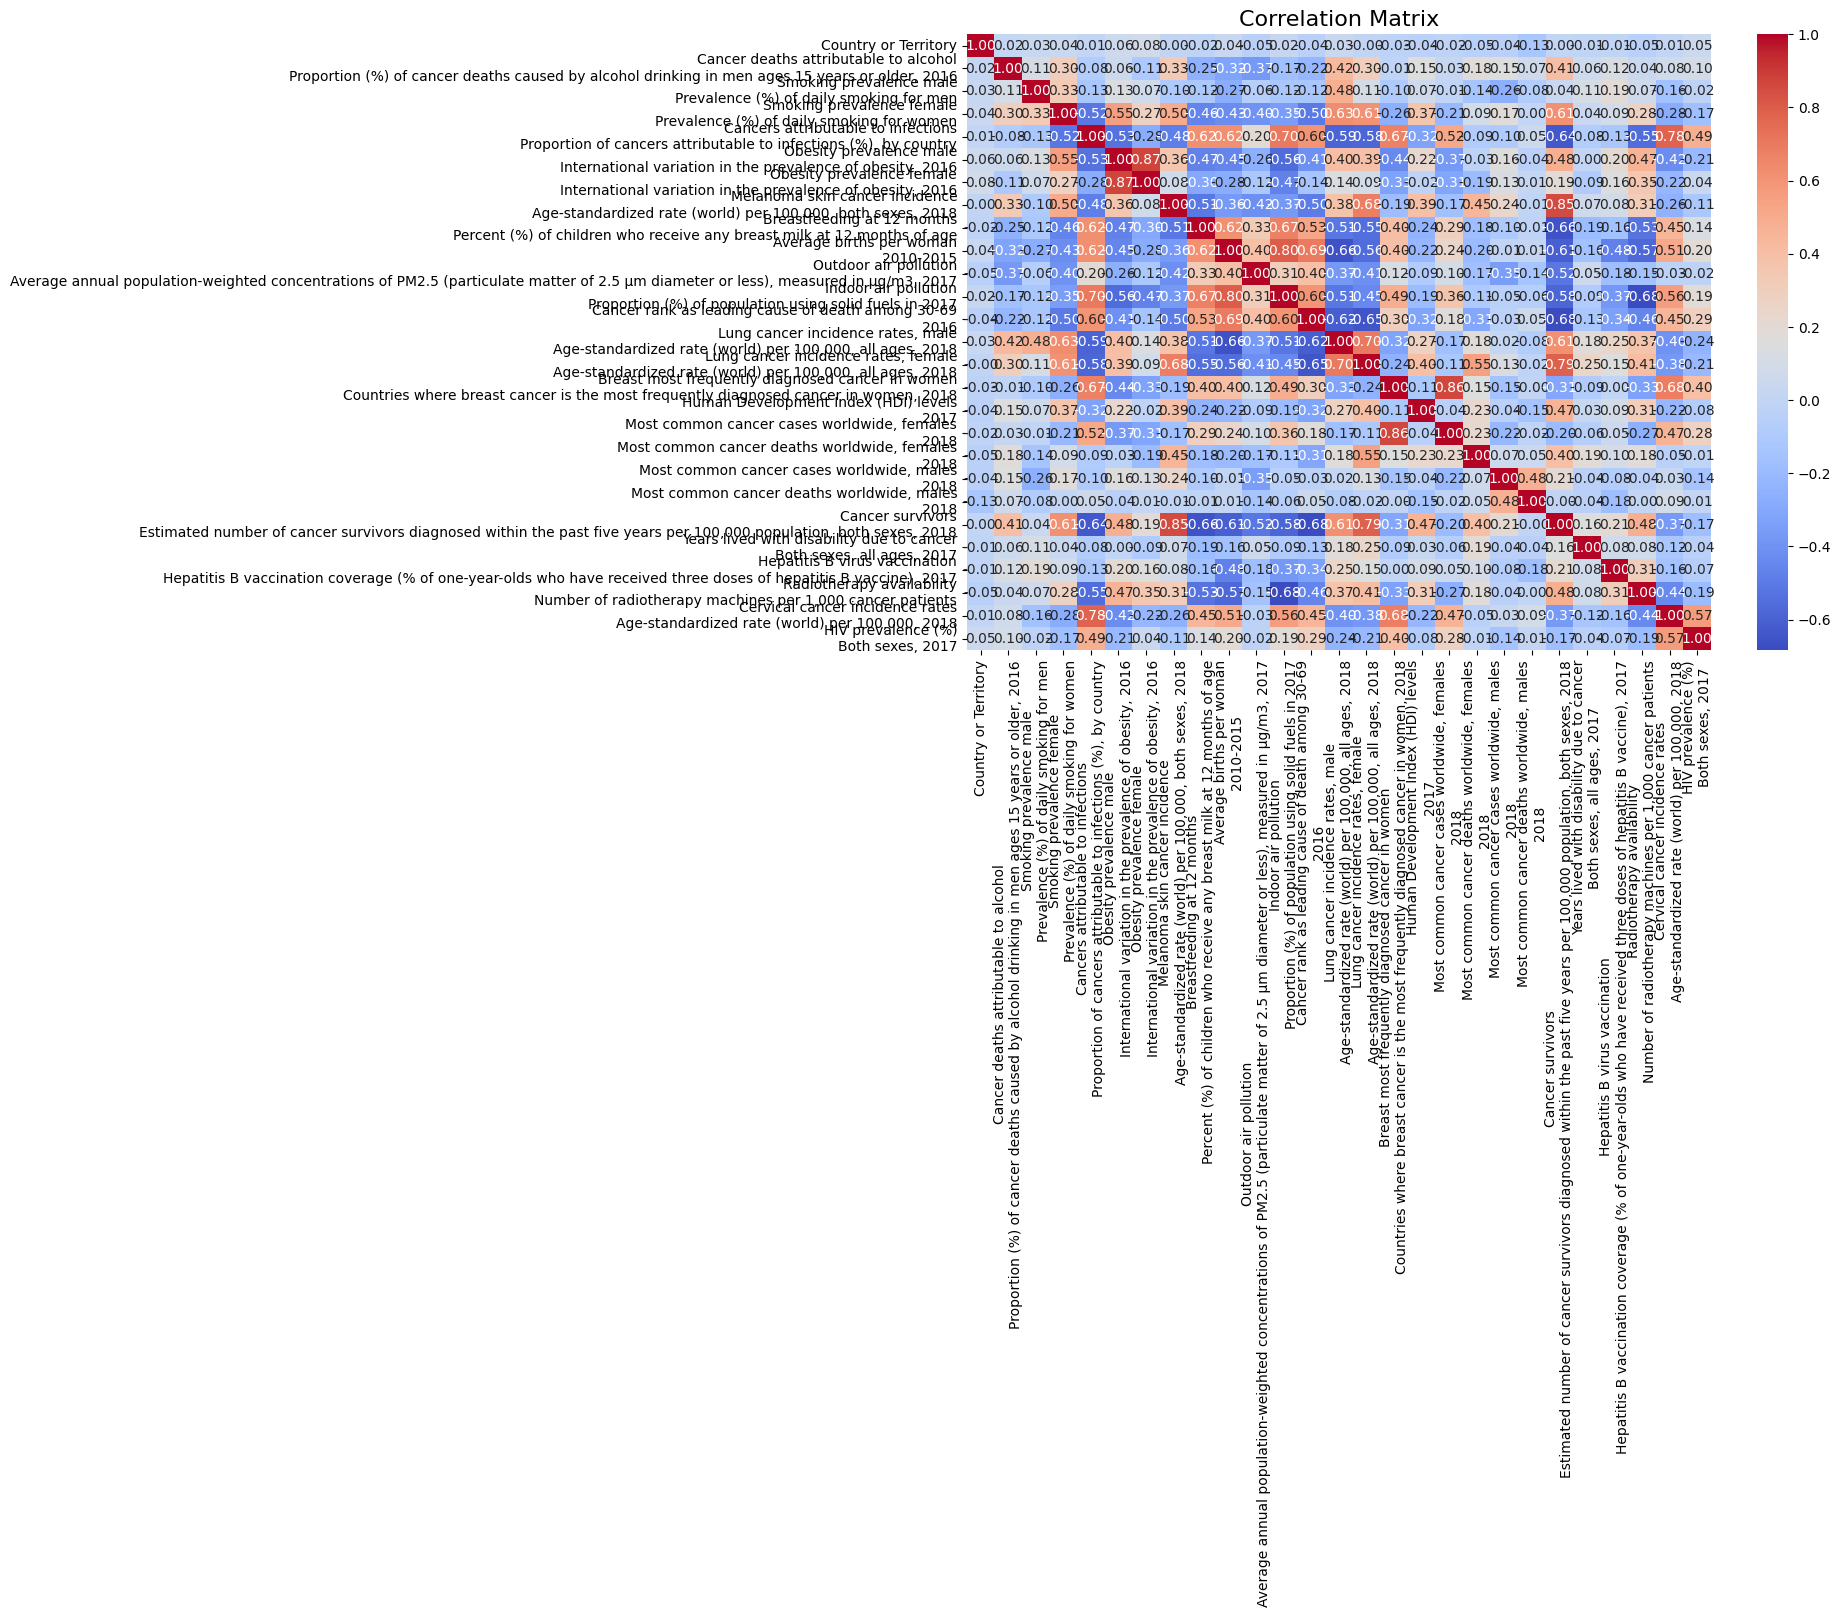

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()


## 2.2 Distributions of Numerical Features

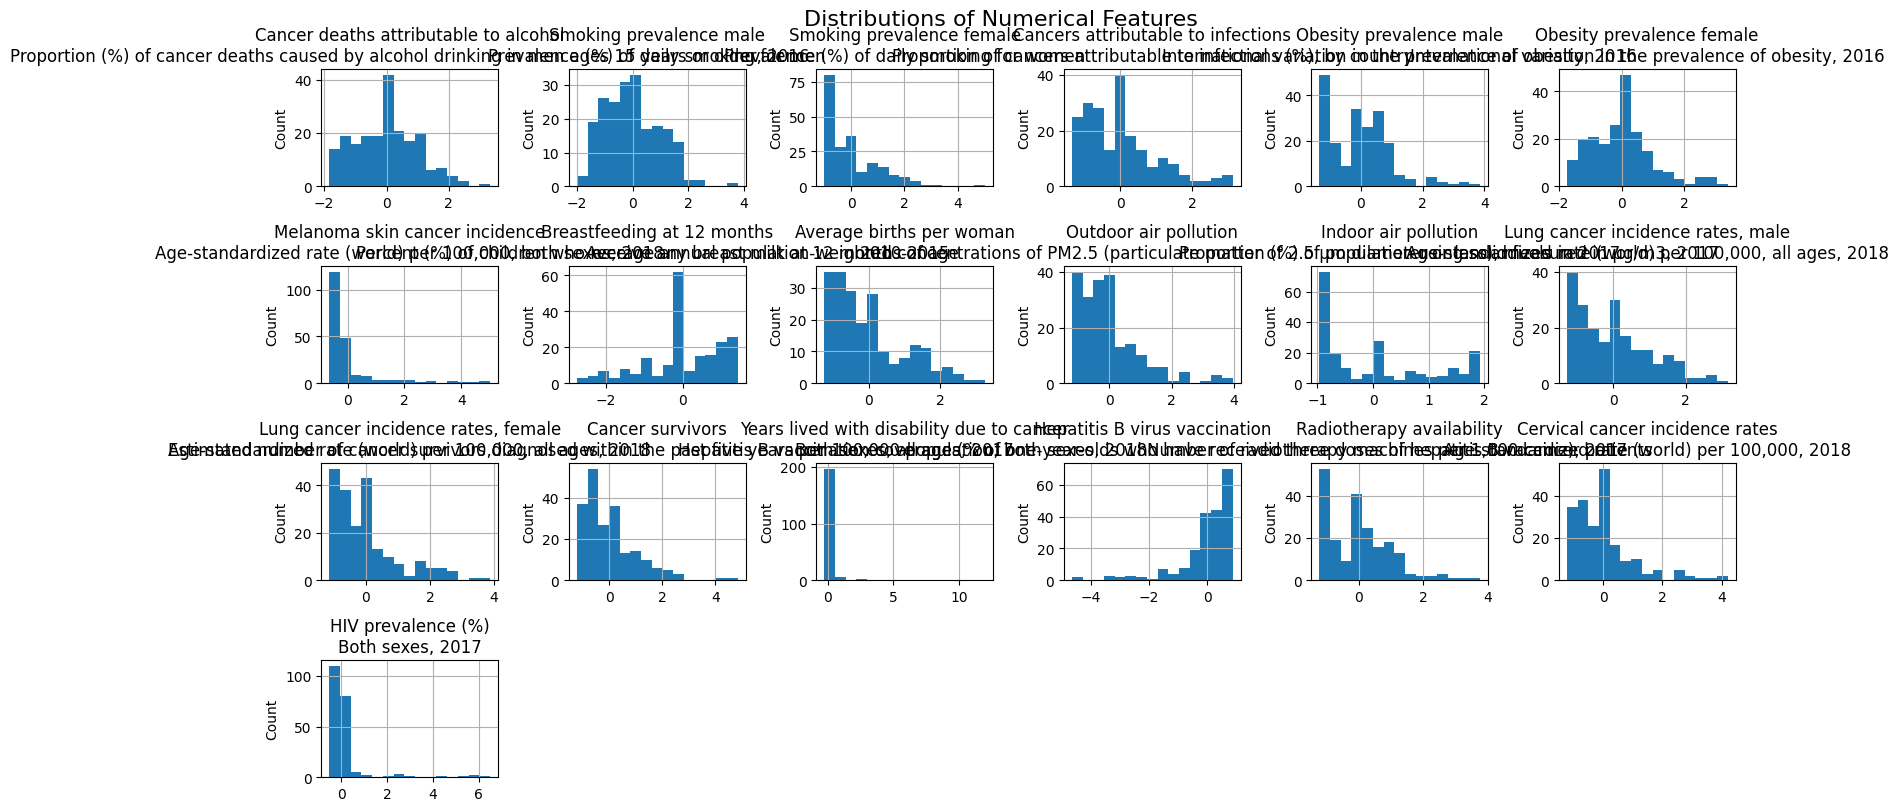

In [44]:
# Plot distributions of numerical features
plt.figure(figsize=(15, 10))

# Loop through each numerical column
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 6, i)
    df[col].hist(bins=15)
    plt.title(col, fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.tight_layout()

plt.suptitle('Distributions of Numerical Features', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


## 2.3 Count Plots for Categorical Features

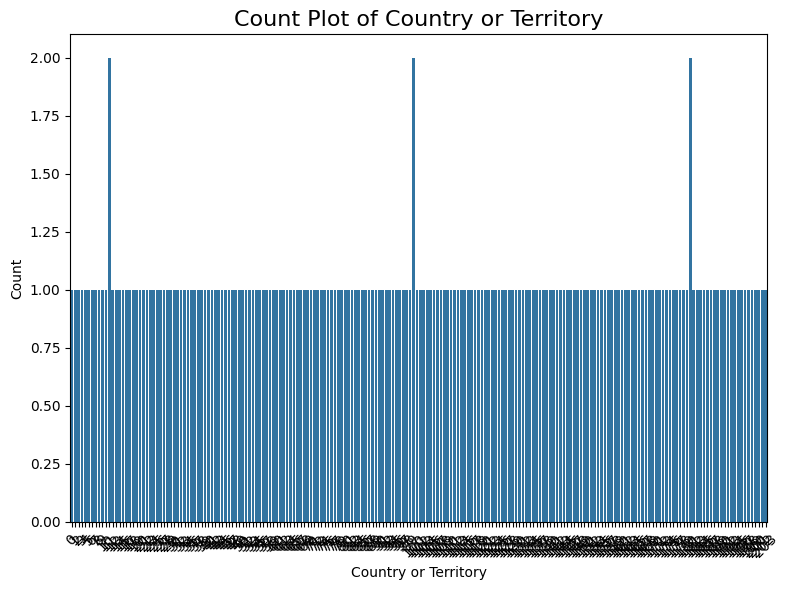

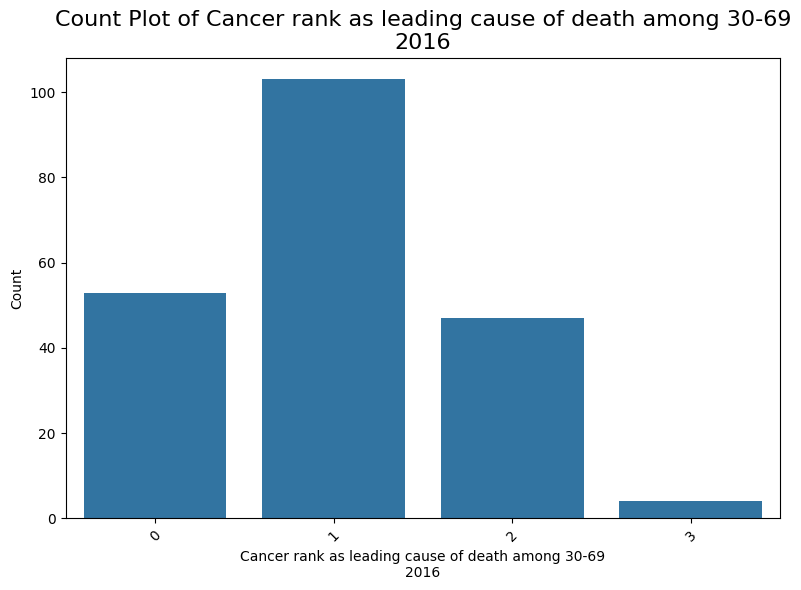

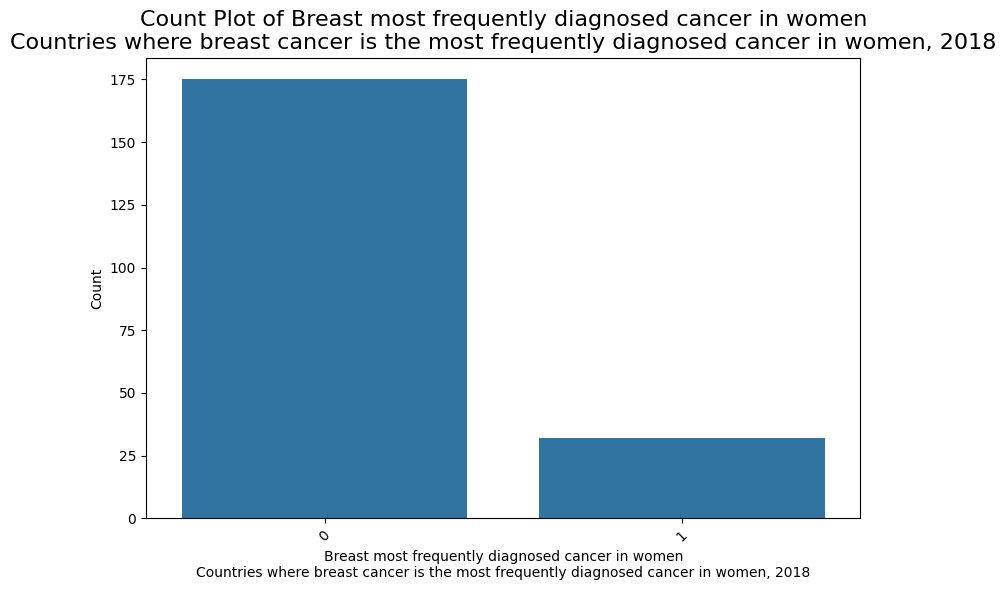

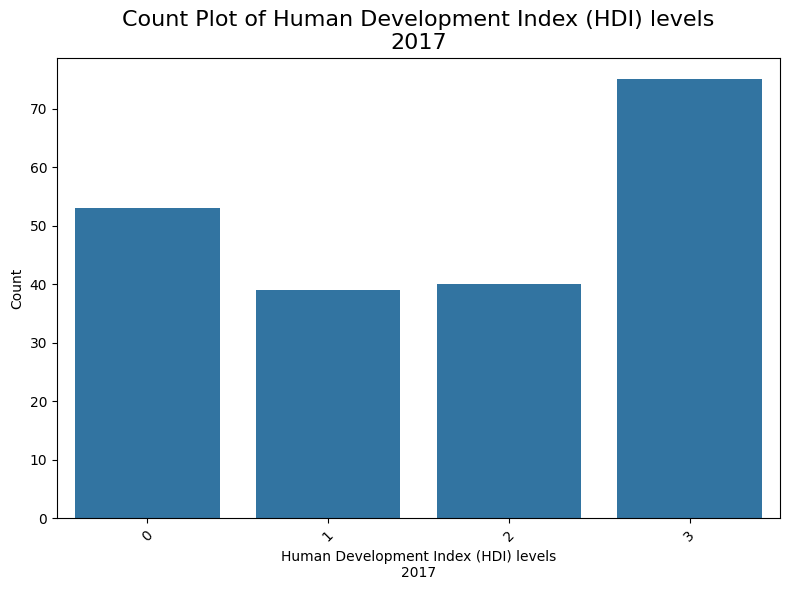

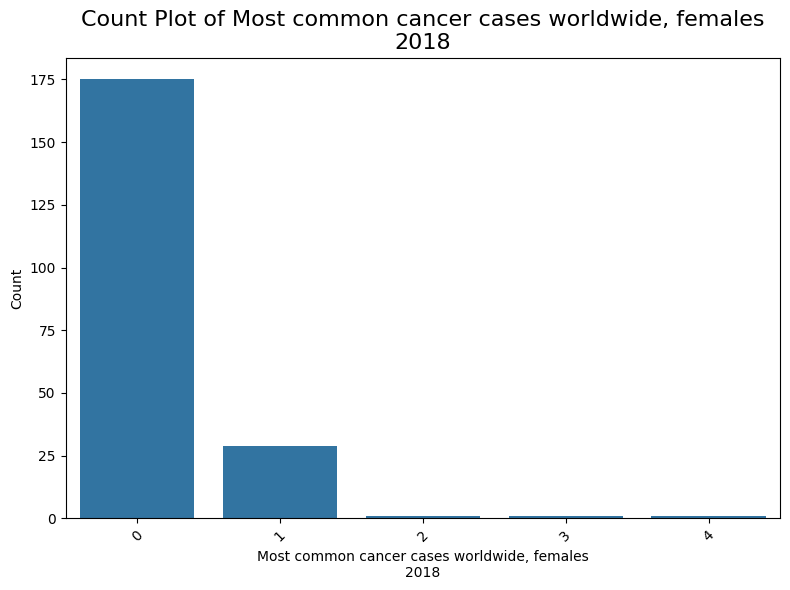

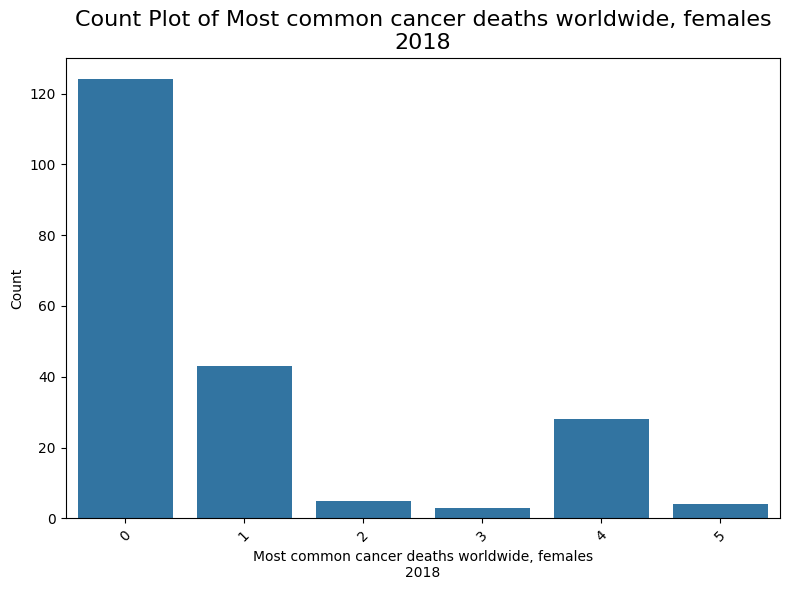

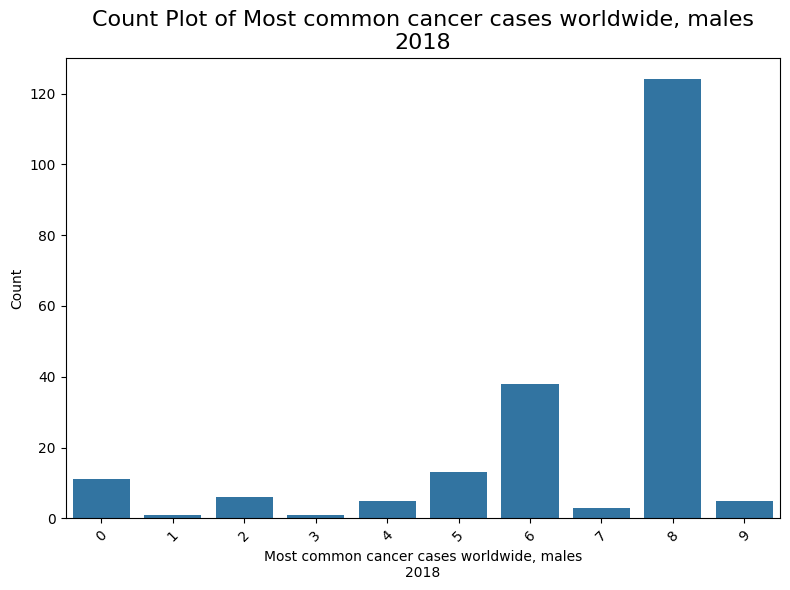

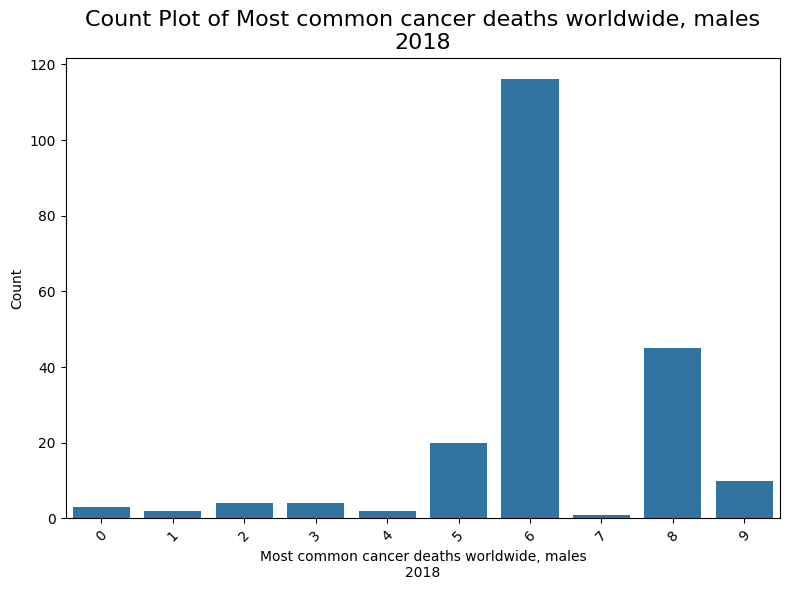

In [45]:
# Plot count plots for categorical features
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}', fontsize=16)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 3. Prepare Data for Deep Learning

## 3.1 Import necessary Libraries

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

## 3.2 Split the data into features and target

In [54]:
X = df.drop('Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country', axis=1)
y = df['Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country']

## 3.3 Split the data into training and testing sets

#### We use train_test_split from scikit-learn to split the data into training and testing sets. The test_size=0.2 means 20% of the data will be used for testing, and the remaining 80% for training. random_state=42 ensures reproducibility.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.4 Define the model architecture

Dense(64, activation='relu', input_shape=(X_train.shape[1],)): The first dense layer with 64 units and ReLU activation. The input_shape is set to the number of features in the training data.

Dropout(0.2): A dropout layer with a rate of 0.2 (20% of the units will be dropped during training) to reduce overfitting.

Dense(32, activation='relu'): The second dense layer with 32 units and ReLU activation.

Dropout(0.2): Another dropout layer.

Dense(1, activation='linear'): The final dense layer with a single unit and linear activation, since this is a regression problem.

In [60]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

/home/nyandieka/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 3.5 Compile the code

We create an instance of the Adam optimizer with a learning rate of 0.001. Then, we compile the model with the optimizer, the mean squared error loss function (since this is a regression problem), and the mean absolute error as an additional metric to monitor during training.



In [62]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

## 3.6 Train the Model

We set the number of epochs to 100 and the batch size to 32. We also define an early stopping callback that monitors the validation loss and stops training if the validation loss doesn't improve for 10 consecutive epochs. The restore_best_weights=True option ensures that the model weights from the epoch with the lowest validation loss are restored after training.
The model.fit function is called to train the model, passing in the training data (X_train, y_train), the number of epochs, batch size, a 20% validation split, and the early stopping callback.

In [63]:
epochs = 100
batch_size = 32
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - loss: 90.3678 - mean_absolute_error: 6.9572 - val_loss: 2.0033 - val_mean_absolute_error: 1.2422
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 102.2468 - mean_absolute_error: 6.9379 - val_loss: 11.1168 - val_mean_absolute_error: 2.7794
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 77.1829 - mean_absolute_error: 6.0978 - val_loss: 6.2127 - val_mean_absolute_error: 2.0797
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 72.1025 - mean_absolute_error: 5.5576 - val_loss: 2.4948 - val_mean_absolute_error: 1.3488
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 73.1497 - mean_absolute_error: 5.8816 - val_loss: 1.6550 - val_mean_absolute_error: 0.9870
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 49.7256 - mean_absolute_error: 4.8531 - val_loss: 6.2847 - val_mean_absolute_error: 2.1464
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 62.7802 - mean_absolute_error: 5.4161 - val_l

## 3.7 Evaluate the model on the test set

In [64]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Mean Absolute Error: {test_mae:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8580 - mean_absolute_error: 0.8103
Test Loss: 0.8619
Test Mean Absolute Error: 0.8080


/home/nyandieka/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 427ms/step - loss: 514.6074 - val_loss: 544.6826
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - loss: 553.3403 - val_loss: 544.4459
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 504.6291 - val_loss: 544.1895
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 494.1212 - val_loss: 544.1018
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 505.4891 - val_loss: 544.0676
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 501.3019 - val_loss: 544.0480
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 532.5378 - val_loss: 544.0276
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 539.5244 - val_loss: 544.0216
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 551.0792 - val_loss: 544.0204
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 553.4347 - val_loss: 544.0199
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 483.2787 - val_loss: 544.0194
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0

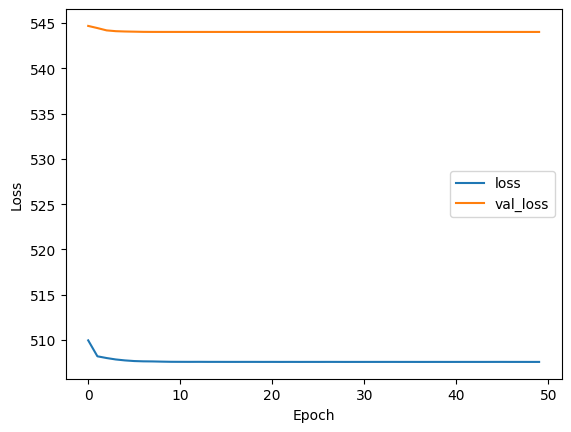

In [66]:
# Define the Stacked Autoencoder model
autoencoder = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(X_train.shape[1], activation='sigmoid')
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
autoencoder_history = autoencoder.fit(X_train, X_train, epochs=50, validation_split=0.2)

# Evaluate the model
reconstructed = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed, 2), axis=1)
print(f"Mean Squared Error for Autoencoder: {mse.mean()}")

# Visualization of Autoencoder training
plt.plot(autoencoder_history.history['loss'], label='loss')
plt.plot(autoencoder_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
